Notebook adaptado del curso “Diplomatura en Inteligencia Artificial y Ciencia de Datos” dictado por la ECyT-UNSAM en el marco del plan Argentina Programa 4.0

# Sobre Umbrales y Metricas en problemas de clasificación, y desbalance de clases

* Umbral
* P-R Curve
* ROC / AUC
* Class weights

## Predecir progresión de cancer de mama

Vamos a usar un dataset compilado y donado por el Dr. William Wolberg de la Universidad de California at Irvine. Es de 1992 y ya hay mucho trabajo sobre uso de este dataset para desarrollar y evaluar algoritmos de predicción (ver referencias).

El dataset tiene:
Number of Samples: 569
Number of Features: 30 numeric, predictive attributes
Number of Classes: 2

Referencias:

 - Wolberg, William. (1992). Breast Cancer Wisconsin (Original). UCI Machine Learning Repository. [Original Wisconsin Breast Cancer Database](https://doi.org/10.24432/C5HP4Z).
 - O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
 - William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
 - O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
 - K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

In [ ]:
# el dataset Wisconsin Breast Cancer (UCI) de Wolberg está en sklearn!
from sklearn import datasets

# sklearn.datasets nos trae los datos con una estructura particular
# sklearn los llama "bunchs"
# as_frame = True nos devuelve un dataframe pandas embebido en el bunch
wbc = datasets.load_breast_cancer(as_frame=True)

# y guardamos el dataframe
df = wbc.frame

In [ ]:
# los bunchs de sklearn son como diccionarios de python
# tienen sus propios metodos para acceder a la info
print(wbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
# veamos las etiquetas de las clases (targets)
print(wbc.target_names)

# cual es la condicion de la etiqueta CERO?
print("Etiqueta 0 = ", wbc.target_names[0])

# y la UNO?
print("Etiqueta 1 = ", wbc.target_names[1])

['malignant' 'benign']
Etiqueta 0 =  malignant
Etiqueta 1 =  benign


Si quieren saber mas sobre otros datasets de sklearn (para jugar, aprender, experimentar) vean [sklearn datasets.](https://scikit-learn.org/stable/datasets.html#datasets)

In [ ]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625  

In [ ]:
df.shape

(569, 31)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Como convención vamos a usar `x` para guardar los datos de nuestros features (variables), y vamos a mantener en forma separada el diagnóstico (Maligno, Benigno) en la variable `y`.

La variable `y`  por lo tanto tiene las etiquetas con las *clases* a las que pertenece cada muestra/paciente. Es nuestro **target** o sea lo que queremos aprender a predecir.

In [ ]:
# generamos nuestros vectores x (datos) -- copiamos el dataframe entero y le borramos la columna 'target' con las etiquetas
x = df.drop(['target'], axis=1)

# y nuestro vector y (etiquetas)
y = df['target']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int32

## Aprendiendo a clasificar los datos

Ahora vamos a intentar aprender a partir de estos datos, y con eso vamos a intentar predecir para cada muestra, la etiqueta o clase a la que pertenece (maligno vs benigno), que va a ser nuestra predicción de pronóstico del cancer.

Como en ejemplos anteriores, vamos a usar cross-validation para entrenar el modelo con un conjunto de datos **independiente** y **diferente** de los datos con los que vamos a evaluar el modelo (para no hacernos trampa).

In [ ]:
# normalizar / estandarizar / re-escalar datos
import numpy as np

from sklearn.preprocessing import MinMaxScaler
#n = (x - np.min(x, axis=0)) / ((np.max(x, axis=0)) - np.min(x, axis=0)).values
scaler = MinMaxScaler().fit(x)

# n son nuestros datos normalizados!
n = scaler.transform(x)


In [ ]:
from sklearn.model_selection import train_test_split

# notar que usamos n en lugar de x (datos normalizados!)
x_train, x_test, y_train, y_test = train_test_split(n, y, test_size=0.15, random_state=666)

In [ ]:
# veamos como fue la particion
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (483, 30)
x test:  (86, 30)
y train:  (483,)
y test:  (86,)


In [ ]:
x_test

array([[0.55274741, 0.25059182, 0.53631401, ..., 0.57525773, 0.26197516,
        0.19362456],
       [0.27824317, 0.12208319, 0.26971184, ..., 0.39690722, 0.16104869,
        0.19998688],
       [0.21482323, 0.30571525, 0.20420151, ..., 0.21704467, 0.34318943,
        0.10048537],
       ...,
       [0.30238061, 0.22590463, 0.29237786, ..., 0.30852234, 0.09520993,
        0.13931523],
       [0.69709877, 0.25498816, 0.67106627, ..., 0.62542955, 0.18628031,
        0.06493506],
       [0.29764778, 0.1707812 , 0.28297975, ..., 0.34398625, 0.09107037,
        0.04604486]])

In [ ]:
y_test

121    0
322    1
55     1
89     1
317    0
      ..
25     0
6      0
124    1
368    0
92     1
Name: target, Length: 86, dtype: int32

Ahora entrenemos nuestro modelo logístico.

In [ ]:
from sklearn.linear_model import LogisticRegression

# y con esto vamos a entrenar
lr = LogisticRegression(penalty="l2")
lr.fit(x_train,y_train)

LogisticRegression()

Ya entrenamos el modelo con los datos *train* (`x_train`, `y_train`) ahora vamos a ver cuales son las predicciones para un conjunto de datos que el modelo no vió hasta ahora.

In [ ]:
# veamos como predice el conjunto de datos de validacion x_test
clasificacion = lr.predict(x_test)

In [ ]:
print(x_test.shape)
print(clasificacion.shape)

(86, 30)
(86,)


In [ ]:
clasificacion

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
print('Omega_0 = {:.2f}'.format(*lr.intercept_))
print('Omega_1 = {:.2f}'.format(lr.coef_[0][0]))
print('Omega_2 = {:.2f}'.format(lr.coef_[0][1]))
print("[...]")
print('Omega_29 = {:.2f}'.format(lr.coef_[0][29]))

Omega_0 = 9.00
Omega_1 = -1.90
Omega_2 = -1.57
[...]
Omega_29 = -0.30


Estos coeficientes indican la contribución de cada característica en la predicción de la variable objetivo. Ordenemoslos por su importancia.

<Axes: ylabel='Feature'>

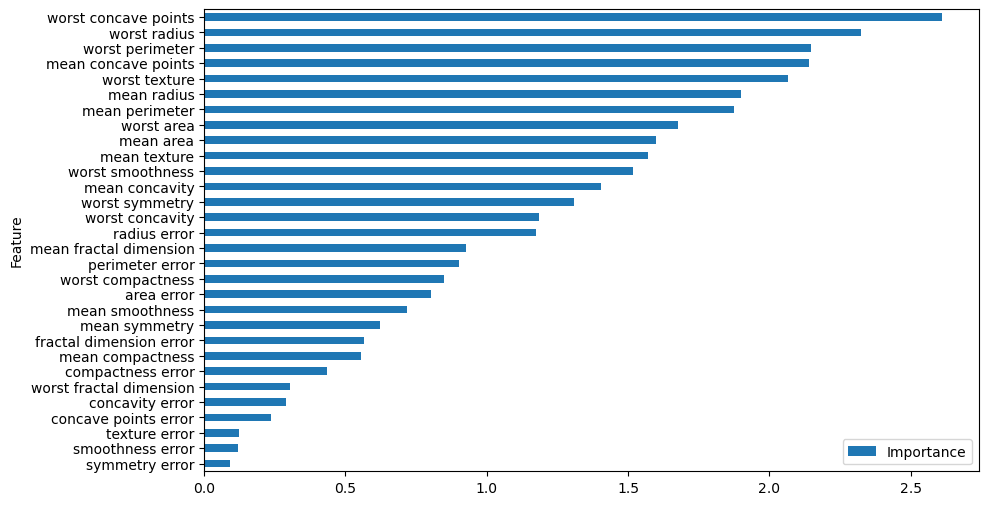

In [ ]:
coefficients = lr.coef_[0]
import pandas as pd
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Y ahora comparemos las etiquetas de la clasificación (predicciones) con las etiquetas *verdaderas* del dataset .

In [ ]:
# y ahora comparemos y_test (validacion) vs prediccion
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

print(f"Exactitud: {round(accuracy_score(y_test, clasificacion), 3)}      (TP + TN / P + N)")
print(f"Precisión: {round(precision_score(y_test, clasificacion), 3)}      (TP / TP + FP)")
print(f"Exhaustividad: {round(recall_score(y_test, clasificacion), 3)}  (TP / TP + FN)")
print("\nMatriz de confusión:")
print(metrics.confusion_matrix(y_test, clasificacion))

Exactitud: 0.942      (TP + TN / P + N)
Precisión: 0.911      (TP / TP + FP)
Exhaustividad: 1.0  (TP / TP + FN)

Matriz de confusión:
[[30  5]
 [ 0 51]]


In [ ]:
# otra manera de evaluar la matriz de confusión
confusion = metrics.confusion_matrix(y_test, clasificacion)

 # verdaderos positivos, True Positive
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 30
TN: 51
FP: 5
FN: 0


Ahora calculemos las probabilidades y evaluemos las curvas ROC y la de Precision-Recall.

In [ ]:
# las probabilidades (scores) de los datos son estas:
probabilidades = lr.predict_proba(x_test)


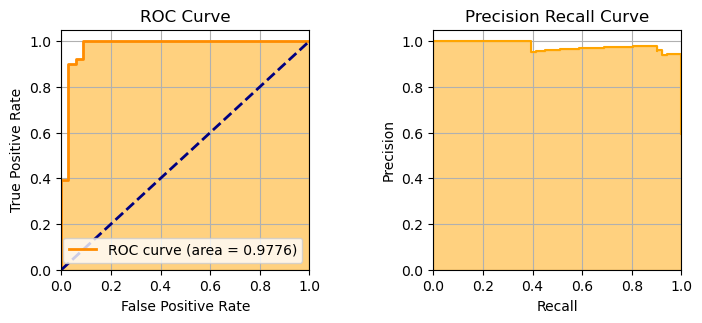

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# nos quedamos con las probabilidades positivas solamente
positive_probs = probabilidades[:, 1]

# Obtengo FPR y TPR en la curva ROC de las etiquetas reales vs los valores de puntuación
fpr, tpr, _ = roc_curve(y_test, positive_probs)

# Calcular el área bajo la curva (AUC) ROC a partir de los puntos de datos FPR y TPR
roc_auc = roc_auc_score(y_test, positive_probs)

# Calcular la precisión y el recall a partir de etiquetas reales frente a valores de puntuación
precision, recall, _ = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left = 0.125 # el lado izquierdo de las subfigura de la figura
right = 0.9 # el lado derecho de las subfiguras de la figura
bottom = 0.1 # la parte inferior de las subfiguras de la figura
top = 0.9 # la parte superior de las subfiguras de la figura
wspace = 0.5 # la cantidad de ancho reservada para el espacio en blanco entre las subfiguras
hspace = 0.2 # la cantidad de alto reservada para el espacio en blanco entre las subfiguras
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

## Balance de los datos

Los datos del dataset Breast Cancer Wisconsin no están balanceados.

In [ ]:
# veamos cuan balanceado estaban nuestro dataset
print(y.value_counts())

# cual es el desbalance?
print("Malignant / Beningo:", y.value_counts()[0] / y.value_counts()[1])

target
1    357
0    212
Name: count, dtype: int64
Malignant / Beningo: 0.5938375350140056


Con `compute_class_weight` de `sklearn.utils.class_weight` se pueden calcular los pesos de las clases en un conjunto de datos desequilibrado.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights

array([1.34198113, 0.79691877])

In [ ]:
# volvemos a entrenar el modelo, ahora con class_weights
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# preprocessing
scaler = MinMaxScaler().fit(x)

# n son nuestros datos normalizados!
n = scaler.transform(x)

# split entre train / test
x_train, x_test, y_train, y_test = train_test_split(n, y, test_size=0.15, random_state=666)

lr =  LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)
clasificacion = lr.predict(x_test)
probabilidades = lr.predict_proba(x_test)


In [ ]:
# y ahora comparemos y_test (validacion) vs prediccion
from sklearn import metrics
print(metrics.accuracy_score(y_test, clasificacion))

0.9418604651162791


In [ ]:
print(metrics.confusion_matrix(y_test, clasificacion))

[[32  3]
 [ 2 49]]


<Axes: ylabel='Feature'>

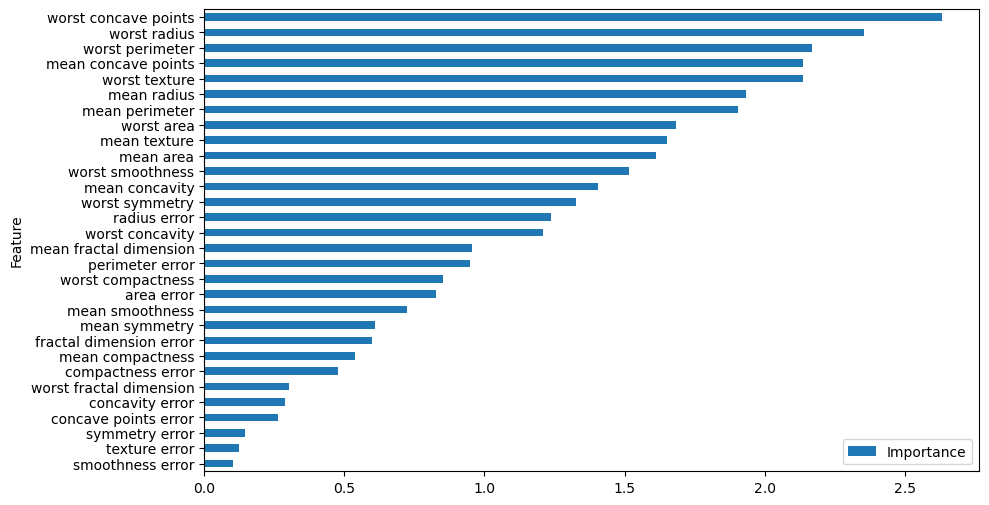

In [ ]:
coeficientes = lr.coef_[0]
import pandas as pd
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coeficientes)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

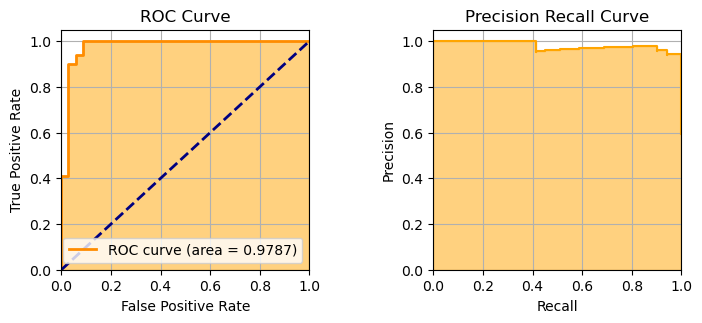

In [ ]:
#@title Plotear Curvas ROC + Precision-Recall
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# nos quedamos con las probabilidades positivas solamente
positive_probs = probabilidades[:, 1]

# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, auc_thresholds = roc_curve(y_test, positive_probs)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
#roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, positive_probs)

# Calculate precision recall and thresholds from true labels vs score values
precision, recall, thresholds = precision_recall_curve(y_test, positive_probs)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.fill_between(fpr,tpr, step='post', alpha=0.5, color='orange')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

In [ ]:
#@title: Funcion para plotear Precision vs Recall vs Umbral
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 5))
    plt.title("Precision vs Recall en funcion del Umbral")
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "m-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Threshold / Umbral")
    plt.legend(loc='best')

def ajustar_clases(y_scores, t):
    """
    La funcion ajusta las predicciones de clases / etiquetas
    de acuerdo a un umbral (threshold (t)).
    Solo funciona para problemas de clasificacion binaria!
    """
    return [1 if y >= t else 0 for y in y_scores]


def precision_recall_threshold(precision, recall, thresholds, t=0.5, label=None):
    """
    plotea la curva precision-recall y muestra el punto
    donde está el umbral del clasificador.
    """

    # acá generamos nuevas etiquetas / clases (o sea nuestras prediccines)
    # en base a un nuevo umbral - el umbral es que que vuelve a redefinir
    # TP, TN, FP, FN -- y por lo tanto la nueva matriz de confusion
    y_pred_adj = ajustar_clases(positive_probs, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                         columns=['pred_neg', 'pred_pos'],
                         index=['neg', 'pos']))
    # plot the curve
    plt.figure(figsize=(8, 3))
    lw = 2
    plt.subplot(1,1,1)
    plt.step(recall, precision, color='orange', where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall con Umbral')
    plt.grid(True)
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(recall[close_default_clf], precision[close_default_clf], 'o', c='red', markersize=8)

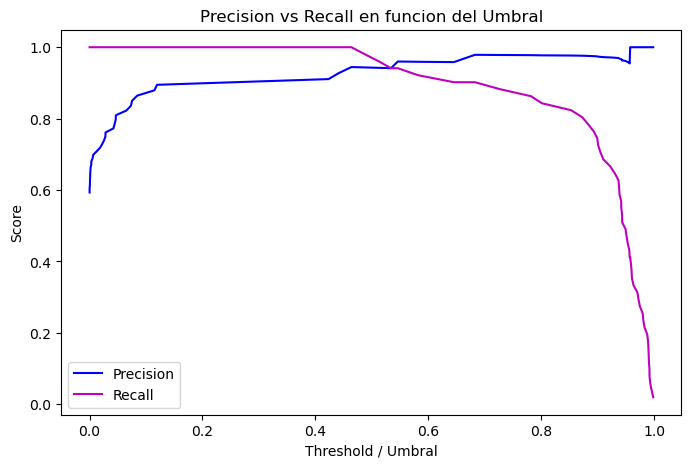

In [ ]:
# usamos los mismos valores (precision, recall, thresholds) que obtuvimos antes
plot_precision_recall_vs_threshold(precision, recall, thresholds)

     pred_neg  pred_pos
neg        33         2
pos         4        47


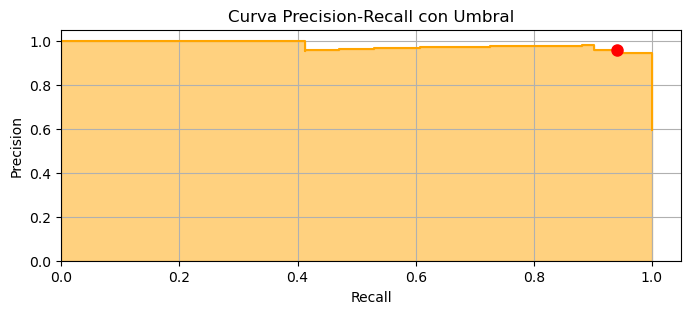

In [ ]:
umbral = 0.56
#dibujamos sobre la curva PR el punto donde queda el umbral y mostramos la matriz de confusión
precision_recall_threshold(precision, recall, thresholds, umbral)

In [ ]:
y_pred_adj = ajustar_clases(positive_probs, umbral)

print(f"Exactitud: {round(accuracy_score(y_test, y_pred_adj), 3)}      (TP + TN / P + N)")
print(f"Precisión: {round(precision_score(y_test, y_pred_adj), 3)}      (TP / TP + FP)")
print(f"Exhaustividad: {round(recall_score(y_test, y_pred_adj), 3)}  (TP / TP + FN)")


Exactitud: 0.93      (TP + TN / P + N)
Precisión: 0.959      (TP / TP + FP)
Exhaustividad: 0.922  (TP / TP + FN)
